##### The goal of this analysis is to find out the two best markets to advertise an e-learning company's product in using 2017 New Coder Surveysurvey data by FreeCodeCamp. https://github.com/freeCodeCamp/2017-new-coder-survey

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
print(df.shape)

(18175, 136)


In [32]:
df.head(2)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## analyze job interests

In [33]:
job_interest_freq = df['JobRoleInterest'].value_counts()
print(job_interest_freq.head(10))

Full-Stack Web Developer                               823
  Front-End Web Developer                              450
  Data Scientist                                       152
Back-End Web Developer                                 142
  Mobile Developer                                     117
Game Developer                                         114
Information Security                                    92
Full-Stack Web Developer,   Front-End Web Developer     64
  Front-End Web Developer, Full-Stack Web Developer     56
  Product Manager                                       55
Name: JobRoleInterest, dtype: int64


Most people are interested in more than one subject.  Will fofus on those who are interested in Web or Mobile development

In [34]:
interest_no_null = df['JobRoleInterest'].dropna()
WM_freq = interest_no_null.str.contains('Web Developer' or 'Mobile Developer')
WM_freq_table = WM_freq.value_counts(normalize = True)*100
WM_freq.sum()/job_interest_freq.sum()*100
web_freq = job_interest_freq.filter(regex='Web Developer').sum()/job_interest_freq.sum()*100
mobile_freq = job_interest_freq.filter(regex='Mobile Developer').sum()/job_interest_freq.sum()*100
print(WM_freq_table)
print('\n', web_freq, '   ', mobile_freq)

True     82.608696
False    17.391304
Name: JobRoleInterest, dtype: float64

 82.6086956521739     32.951945080091534


(0, 90)

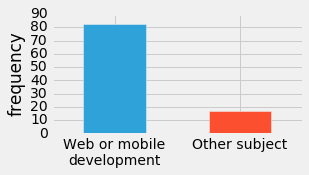

In [35]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(4,2))
WM_freq_table.plot.bar()
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.ylabel('frequency')
plt.ylim([0,90])

### analyze coder locations

(0, 2000)

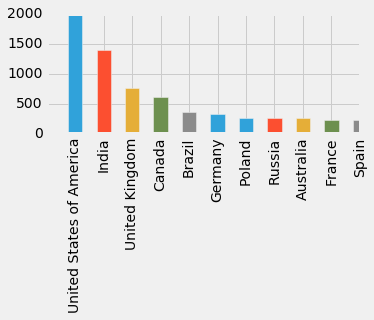

In [36]:
freq = df['CountryLive'].value_counts()
plt.figure(figsize=(5,2))
freq.plot.bar()
plt.xlim(-1,10)
plt.ylim(0, 2000)

US and India are the two most attrictive markets for advertisement

(0, 0.4)

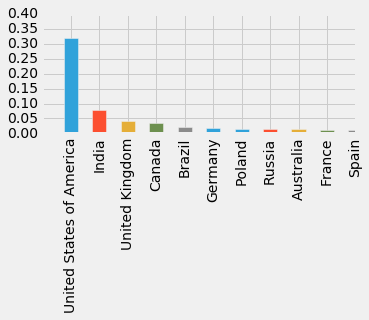

In [37]:
relative_freq = freq / df.shape[0]
plt.figure(figsize=(5,2))
relative_freq.plot.bar()
plt.xlim(-1,10)
plt.ylim(0, 0.4)

In [38]:
relative_freq.head(5)

United States of America    0.318624
India                       0.077029
United Kingdom              0.041651
Canada                      0.033893
Brazil                      0.020028
Name: CountryLive, dtype: float64

### coder's willingness to pay

In [39]:
df['MonthsProgramming'] = df['MonthsProgramming'].apply(lambda x: 1 if x ==0 else x)
df['Dollar_per_month'] = df['MoneyForLearning']/df['MonthsProgramming']
df['Dollar_per_month'].value_counts(dropna=False).sort_values(ascending=False).head(10)

 0.000000      7736
NaN            1995
 16.666667      317
 8.333333       315
 50.000000      292
 25.000000      278
 100.000000     252
 33.333333      239
 4.166667       222
 10.000000      214
Name: Dollar_per_month, dtype: int64

In [40]:
df = df.dropna(subset=['Dollar_per_month'])
df['Dollar_per_month'].value_counts(ascending=False).head(5)

0.000000     7736
16.666667     317
8.333333      315
50.000000     292
25.000000     278
Name: Dollar_per_month, dtype: int64

In [13]:
df['CountryLive'].value_counts(dropna=False).head(5)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

##### analyze data based on countries of interest

In [19]:
c1=df['CountryLive']=='United States of America'
c2=df['CountryLive']=='India'
c3=df['CountryLive']=='United Kingdom'
c4=df['CountryLive']=='Canada'
df1 = df.loc[c1|c2|c3|c4]
df1['CountryLive'].value_counts()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

In [20]:
df1_group = df1.groupby('CountryLive')
df1_group['Dollar_per_month'].mean()

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: Dollar_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


([<matplotlib.axis.XTick at 0x7f48f97286d8>,
 <a list of 4 Text xticklabel objects>)

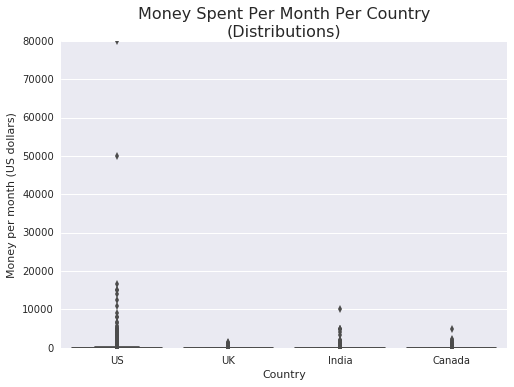

In [25]:
import seaborn as sns
sns.boxplot(y = 'Dollar_per_month', x = 'CountryLive', data = df1)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

In [39]:
df2 = df1[df1['Dollar_per_month'] < 20000]
print(df1.shape, df2.shape)

(3915, 137) (3913, 137)


In [40]:
df2_group = df2.groupby('CountryLive')
df2_group['Dollar_per_month'].mean()

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: Dollar_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


([<matplotlib.axis.XTick at 0x7f48f95619e8>,
 <a list of 4 Text xticklabel objects>)

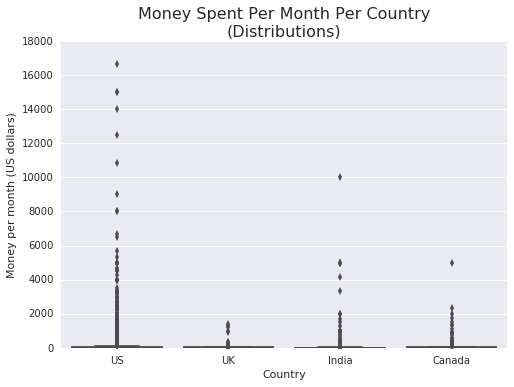

In [41]:
sns.boxplot(y = 'Dollar_per_month', x = 'CountryLive', data = df2)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

In [55]:
s1 = df2['CountryLive'] == 'United States of America'
s2 = df2['Dollar_per_month'] >= 6000
df2_cleaned = df2.drop(df2[s1&s2].index)
df2_cleaned.shape

(3902, 137)

In [56]:
s1 = df2_cleaned['CountryLive'] == 'India'
s2 = df2_cleaned['Dollar_per_month'] > 2500
df2_cleaned = df2_cleaned.drop(df2_cleaned[s1&s2].index)
df2_cleaned.shape

(3896, 137)

In [57]:
s1 = df2_cleaned['CountryLive'] == 'Canada'
s2 = df2_cleaned['Dollar_per_month'] > 4000
df2_cleaned = df2_cleaned.drop(df2_cleaned[s1&s2].index)
df2_cleaned.shape

(3895, 137)

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


([<matplotlib.axis.XTick at 0x7f49095f3358>,
 <a list of 4 Text xticklabel objects>)

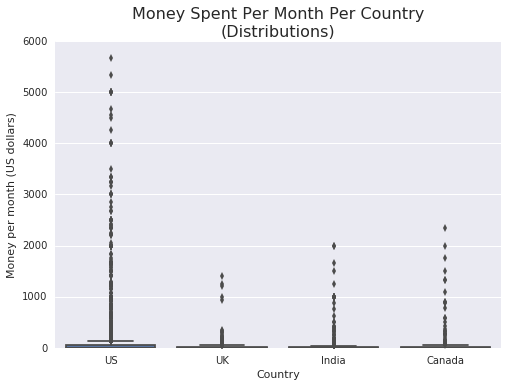

In [59]:
sns.boxplot(y = 'Dollar_per_month', x = 'CountryLive', data = df2_cleaned)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

In [60]:
df2_cleaned_group = df2_cleaned.groupby('CountryLive')
df2_cleaned_group['Dollar_per_month'].mean()

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: Dollar_per_month, dtype: float64

Apparently, students in US, Canada and India are all willing to pay monthly premiums that are above the basic premium of $59.  Therefore, they are all potential market for addiitonal advertisement.